In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv('..\listings.csv')

In [3]:
listings.head(2)

Unnamed: 0 Stock Symbol                           Company Name  Last Sale  \
0           0         XXII                22nd Century Group, Inc       1.33   
1           1          FAX  Aberdeen Asia-Pacific Income Fund Inc       5.00   

   Market Capitalization  IPO Year                 Sector  \
0           1.206285e+08       NaN  Consumer Non-Durables   
1           1.266333e+09    1986.0                    NaN   

                Industry Exchange  
0  Farming/Seeds/Milling     amex  
1                    NaN     amex

### The highest median market capitalization

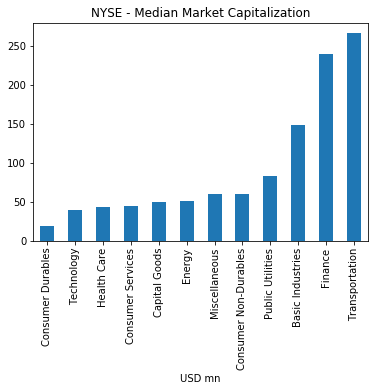

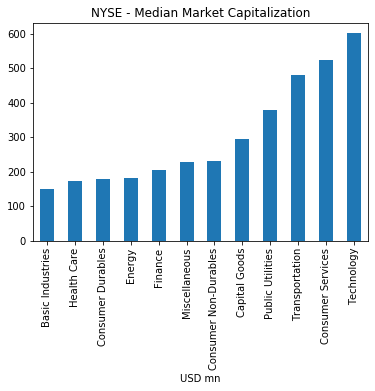

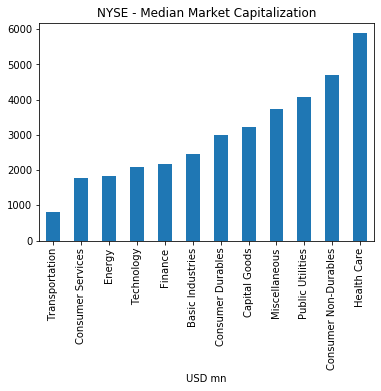

In [5]:
exchanges = ['amex', 'nasdaq', 'nyse']

for exchange in exchanges:
    df_exchange = listings[listings.Exchange == exchange]
    mc = df_exchange.loc[:, 'Market Capitalization'].div(1e6)
    df_exchange.loc[:, 'market_cap_m'] = mc
    df_exchange = df_exchange.drop('Market Capitalization', axis=1)
    mcap_by_sector = df_exchange.groupby('Sector')
    median_mcap_by_sector = mcap_by_sector.market_cap_m.median()
    median_mcap_by_sector = median_mcap_by_sector.sort_values(ascending=True)
    median_mcap_by_sector.plot(kind='bar', title='NYSE - Median Market Capitalization')

    plt.xlabel('USD mn')
    plt.show()